# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [50]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [51]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | hotan
Processing Record 6 of Set 1 | iquique
Processing Record 7 of Set 1 | kilkeel
Processing Record 8 of Set 1 | noosa heads
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | afif
Processing Record 11 of Set 1 | iskateley
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | atafu village
Processing Record 16 of Set 1 | afaahiti
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 19 of Set 1 | vorgashor
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | la ronge
Processing Record 22 of 

In [52]:
print(city_lat)

53.3168


In [54]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [55]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,22.83,89,75,7.72,ZA,1707275524
1,adamstown,-25.0660,-130.1015,25.01,85,94,5.16,PN,1707275524
2,thompson,55.7435,-97.8558,-24.80,96,13,2.39,CA,1707275247
3,port-aux-francais,-49.3500,70.2167,6.76,99,100,7.88,TF,1707275525
4,hotan,37.0997,79.9269,-3.45,68,12,0.83,CN,1707275526


In [56]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [57]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,22.83,89,75,7.72,ZA,1707275524
1,adamstown,-25.0660,-130.1015,25.01,85,94,5.16,PN,1707275524
2,thompson,55.7435,-97.8558,-24.80,96,13,2.39,CA,1707275247
3,port-aux-francais,-49.3500,70.2167,6.76,99,100,7.88,TF,1707275525
4,hotan,37.0997,79.9269,-3.45,68,12,0.83,CN,1707275526


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

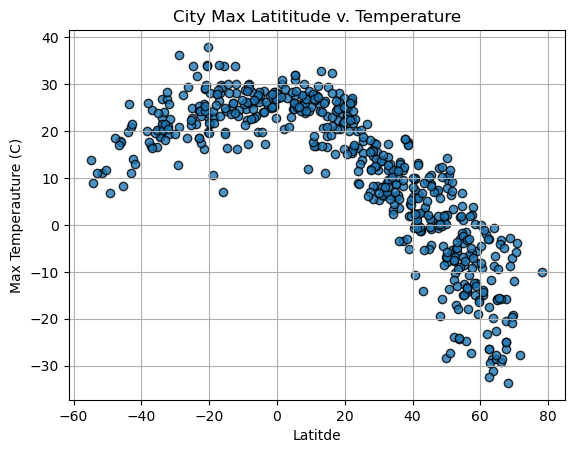

In [58]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors= "black",linewidths=1,marker="o",alpha=0.8,label="cities")

# Incorporate the other graph properties
plt.xlabel('Latitde')
plt.ylabel('Max Temperauture (C)')
plt.title('City Max Latititude v. Temperature')
plt.grid(True)
# Save the figure

plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

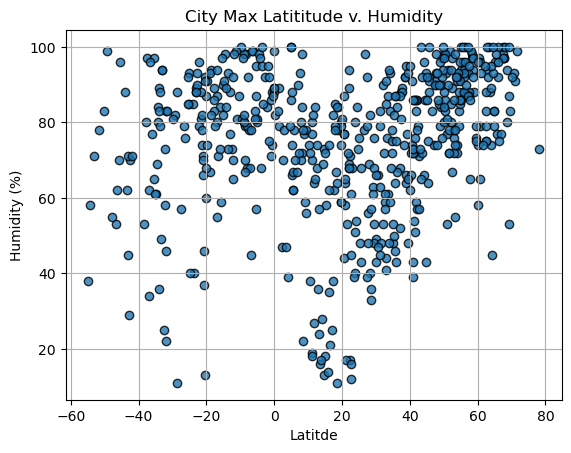

In [59]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors= "black",linewidths=1,marker="o",alpha=0.8,label="cities")

# Incorporate the other graph properties
plt.xlabel('Latitde')
plt.ylabel('Humidity (%)')
plt.title('City Max Latititude v. Humidity')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

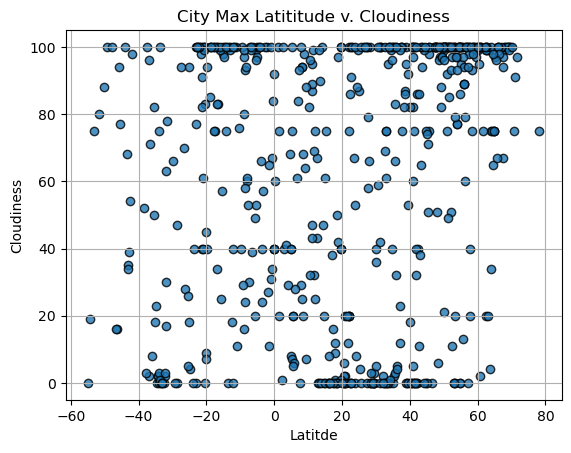

In [60]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors= "black",linewidths=1,marker="o",alpha=0.8,label="cities")

# Incorporate the other graph properties
plt.xlabel('Latitde')
plt.ylabel('Cloudiness')
plt.title('City Max Latititude v. Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

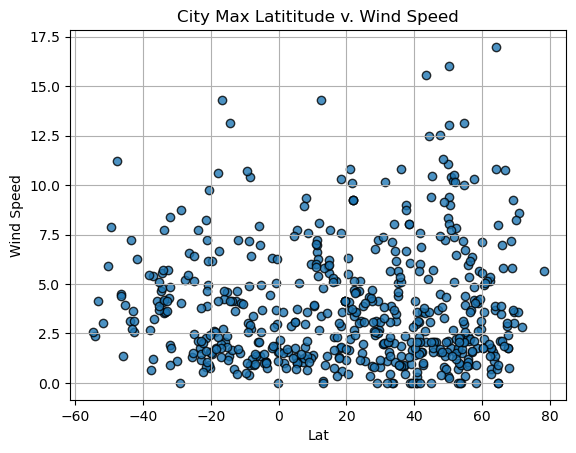

In [74]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors= "black",linewidths=1,marker="o",alpha=0.8,label="cities")

# Incorporate the other graph properties
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.title('City Max Latititude v. Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [75]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, text_coordinates,title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress = x_values* slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x +" +str(round(intercept,2))

    #plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "blue" )
    plt.xlabel('Lat')
    plt.ylabel(title)
    print(f'r_value is: {rvalue**2}')
    plt.show()

    

In [76]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[(city_data_df['Lat']>=0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,thompson,55.7435,-97.8558,-24.80,96,13,2.39,CA,1707275247
4,hotan,37.0997,79.9269,-3.45,68,12,0.83,CN,1707275526
6,kilkeel,54.0620,-6.0031,1.64,72,77,1.51,GB,1707275527
9,afif,23.9065,42.9172,8.90,40,0,5.14,SA,1707275528
10,iskateley,67.6803,53.1512,-24.99,97,100,1.79,RU,1707275528


In [77]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[(city_data_df['Lat']<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,22.83,89,75,7.72,ZA,1707275524
1,adamstown,-25.0660,-130.1015,25.01,85,94,5.16,PN,1707275524
3,port-aux-francais,-49.3500,70.2167,6.76,99,100,7.88,TF,1707275525
5,iquique,-20.2208,-70.1431,23.08,87,9,0.76,CL,1707275527
7,noosa heads,-26.3833,153.1500,29.50,76,28,6.55,AU,1707275527


###  Temperature vs. Latitude Linear Regression Plot

r_value is: 0.7879753025621605


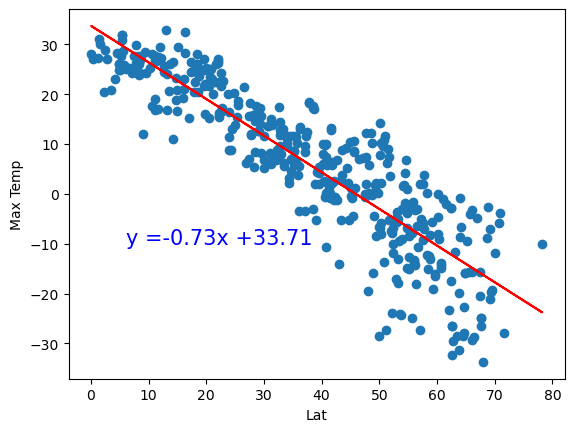

In [78]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Max Temp"]
linear_regression(x_value,y_value,  (6,-10),"Max Temp")



r_value is: 0.286049769232543


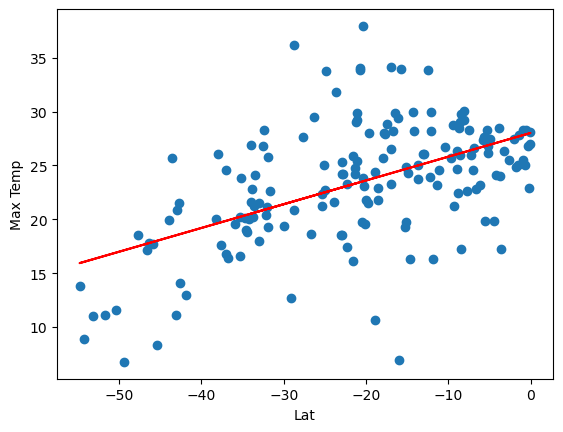

In [79]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Max Temp"]
linear_regression(x_value,y_value, (6,-10),"Max Temp")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

r_value is: 0.22989892759705857


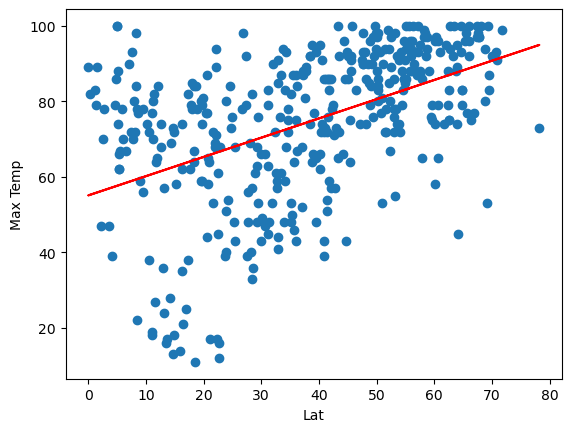

In [80]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Humidity"]
linear_regression(x_value,y_value, (6,-10),"Max Temp")

r_value is: 0.12033793056107317


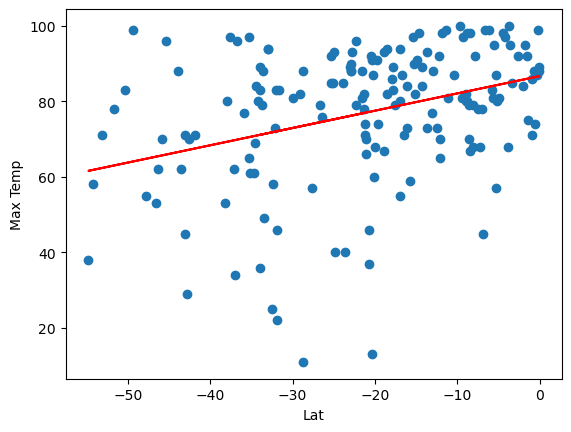

In [81]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Humidity"]
linear_regression(x_value,y_value, (6,-10),"Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

r_value is: 0.16062975876559402


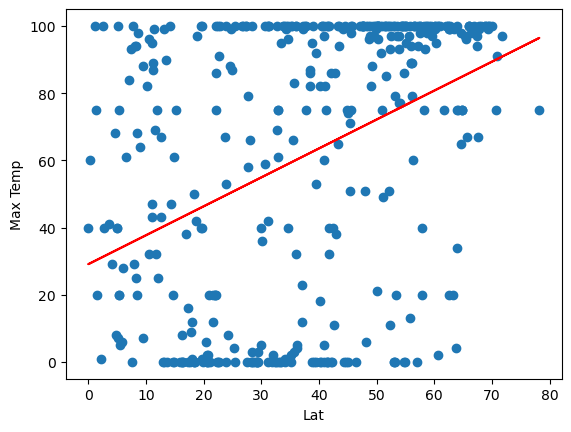

In [82]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Cloudiness"]
linear_regression(x_value,y_value, (6,-10),"Max Temp")

r_value is: 0.05237845329247284


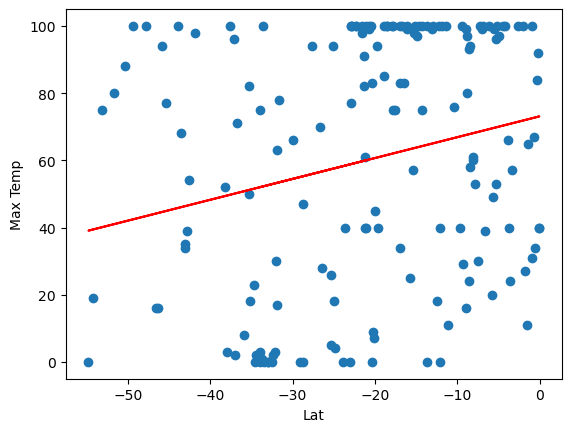

In [83]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Cloudiness"]
linear_regression(x_value,y_value, (6,-10),"Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

r_value is: 0.010959394873416316


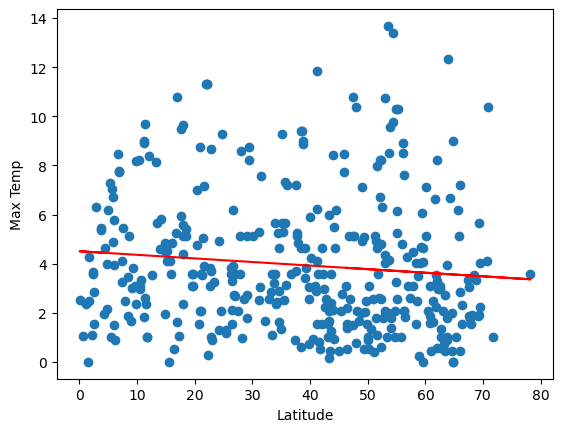

In [39]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Wind Speed"]
linear_regression(x_value,y_value, (6,-10),"Max Temp")

r_value is: 0.046647674491628224


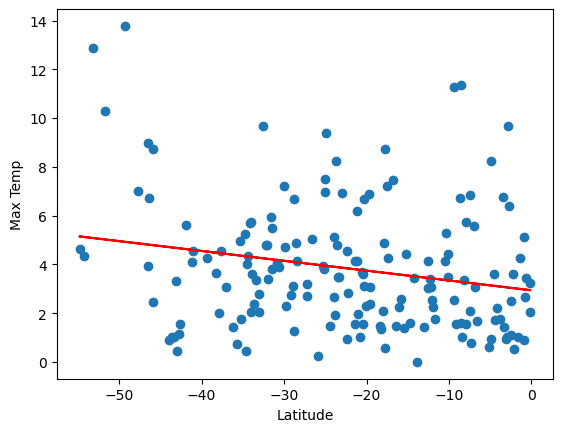

In [40]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Wind Speed"]
linear_regression(x_value,y_value, (6,-10),"Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE